In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
#Increase output window size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [237]:
df_train = pd.read_csv('Train_UWu5bXk.csv')
df_test =  pd.read_csv('Test_u94Q5KV.csv')

In [238]:
#Merge Train & Test Dataset so we can clean both of them together
df_train['Source'] = 'Train'
df_test['Source'] = 'Test'
df = pd.concat([df_train,df_test], ignore_index = True, sort = True)

# Exploratory Data Analysis

In [239]:
df.info() #Check Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [240]:
df.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F851CFA58>,
      dtype=object)

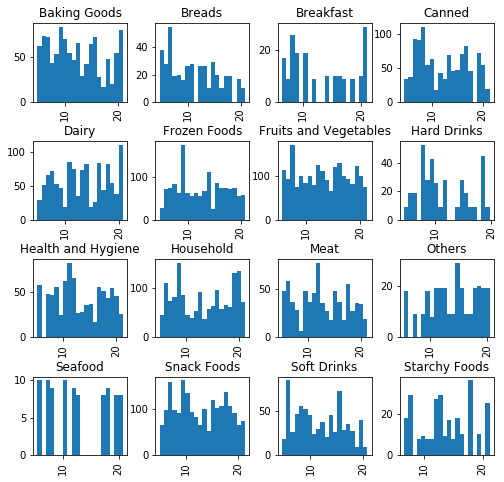

In [278]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax,column = 'Item_Weight',bins=20,by = "Item_Type" )

In [242]:
df.apply(lambda x: sum(x.isnull())) ## Identify Null Values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [243]:
cv = pd.crosstab([df.Outlet_Type,df.Outlet_Location_Type],df.Outlet_Size) 
cv

Outlet_Size                             High  Medium  Small
Outlet_Type       Outlet_Location_Type                     
Grocery Store     Tier 1                   0       0    880
Supermarket Type1 Tier 1                   0    1550   1550
                  Tier 2                   0       0   1550
                  Tier 3                1553       0      0
Supermarket Type2 Tier 3                   0    1546      0
Supermarket Type3 Tier 3                   0    1559      0

In [244]:
df[(df.loc[:,'Outlet_Location_Type'] == 'Tier 3') & (pd.isnull(df.loc[:,'Outlet_Size'])) & (df.loc[:,'Outlet_Type'] == 'Supermarket Type 1')] 

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source


# DATA CLEANING:

In [245]:
from statistics import mode 
#Determing the mode for each

outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str'))))

outlet_size_mode
miss_bool = df['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(miss_bool))
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('Missing values: %s'%sum(df['Outlet_Size'].isnull()))

##Outlet_Size for Grocery is not getting changed so did it seperately
df['Outlet_Size'] = df['Outlet_Size'].str.replace("nan","Small" )
df['Outlet_Size'].fillna('Small', inplace = True)


Orignal #missing: 4016
Missing values: 0


In [246]:
#Fill missing values in Item_weight column:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier', aggfunc = np.mean)
item_avg_weight
miss_bool = df['Item_Weight'].isnull() 
df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
print('Missing Values: %d'% sum(df['Item_Weight'].isnull()))

Missing Values: 0


In [247]:
df.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    628
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
Source                           2
dtype: int64

In [248]:
#Filter categorical variables
Category = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
Category = [x for x in Category if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in Category:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

F

# Feature Engineering

In [249]:
#Item_Visibility column has some zero which is not possible
#Fill  missing values in Item_Visibility column: 
df['Item_Visibility'] = df['Item_Visibility'].astype('float', inplace = True)

visibility_avg = df.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
df.loc[missing_values, 'Item_Visibility'] = df.loc[missing_values, 'Item_Identifier'].apply(lambda x: visibility_avg.loc[x] )
print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [250]:
# Visibility Avg mean ratio 
df['Item_Visibility_MeanRatio'] = df.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(df['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [251]:
# Create category beacuse there are 16 item type.
df['Product_Category'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Product_Category'] = df['Product_Category'].map({'FD': 'Food','NC':'Non-Consumable','DR':'Drinks'})

In [252]:
#Since when the store is open, Dataset is of 2013
df['Outlet__Running_Since'] = df['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [253]:
df['Item_Fat_Content'] = df.Item_Fat_Content.str.replace("LF", "Low Fat")
df['Item_Fat_Content'] = df.Item_Fat_Content.str.replace("reg", "Regular")
df['Item_Fat_Content'] = df.Item_Fat_Content.str.replace("low fat", "Low Fat")

In [254]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [255]:
#Non_Consumable product can't belong to low_fat, hence we introduced a new category
df.loc[df['Product_Category'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Edible'

In [260]:
#Change Data Type of Item_Visibility 
pd.to_numeric(df['Item_Visibility'], downcast='float')

0        0.016047
1        0.019278
2        0.016760
3        0.017834
4        0.009780
5        0.057059
6        0.012741
7        0.127470
8        0.016687
9        0.094450
10       0.040627
11       0.045464
12       0.100014
13       0.047257
14       0.068024
15       0.069089
16       0.008596
17       0.069196
18       0.034238
19       0.102492
20       0.138190
21       0.035400
22       0.025698
23       0.057557
24       0.025896
25       0.099887
26       0.066693
27       0.019356
28       0.161467
29       0.072222
           ...   
14174    0.048645
14175    0.087847
14176    0.028977
14177    0.024077
14178    0.099375
14179    0.158425
14180    0.035911
14181    0.037656
14182    0.044073
14183    0.026065
14184    0.020225
14185    0.026234
14186    0.033516
14187    0.045168
14188    0.024110
14189    0.014019
14190    0.045270
14191    0.288892
14192    0.072529
14193    0.037092
14194    0.054463
14195    0.036594
14196    0.094053
14197    0.030704
14198    0

In [261]:
df.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Source                        object
Item_Visibility_MeanRatio    float64
Product_Category              object
Outlet__Running_Since          int64
dtype: object

# -----### Resolve baseline model with sales as per outlet type####----

In [262]:
"""#Baseline Model prep
bv = df.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')
bv
mising_values = (df['Outlet_Identifier'] != 0)
df['Item_Outlet_Sales_category'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: bv.loc[x])
df"""

"#Baseline Model prep\nbv = df.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')\nbv\nmising_values = (df['Outlet_Identifier'] != 0)\ndf['Item_Outlet_Sales_category'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: bv.loc[x])\ndf"

# One Hot Encoding

In [263]:
"""from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Product_Category'] = le.fit_transform(df['Product_Category'])"""

"from sklearn.preprocessing import LabelEncoder \nle = LabelEncoder()\ndf['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])\ndf['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])\ndf['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])\ndf['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])\ndf['Product_Category'] = le.fit_transform(df['Product_Category'])"

In [264]:
df = pd.get_dummies(df, columns =  ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type','Product_Category'])

In [265]:
df_train = df[df['Source']=="Train"]
df_test = df[df['Source']=="Test"]

In [266]:
df_train.drop(['Outlet_Establishment_Year','Item_Type', 'Source'],axis = 1, inplace = True)

C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [267]:
df_test.drop(['Outlet_Establishment_Year','Item_Type', 'Source'],axis = 1, inplace = True)

C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [268]:
"""#Baseline Model
cv = df_train['Item_Outlet_Sales'].mean()
print(cv)
baseline_model = df_test
baseline_model.loc[:,'Item_Outlet_Sales'] = cv
baseline_model"""

"#Baseline Model\ncv = df_train['Item_Outlet_Sales'].mean()\nprint(cv)\nbaseline_model = df_test\nbaseline_model.loc[:,'Item_Outlet_Sales'] = cv\nbaseline_model"

In [269]:
df_train

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet__Running_Since,Item_Fat_Content_Edible,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Category_Drinks,Product_Category_Food,Product_Category_Non-Consumable
0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,0.931078,14,0,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,0.933420,4,0,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,0.960069,14,0,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,1.000000,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,1.000000,26,1,0,...,1,0,0,0,1,0,0,0,0,1
5,FDP36,51.4008,556.6088,0.057059,10.395,OUT018,1.000000,4,0,0,...,0,1,0,0,0,1,0,0,1,0
6,FDO10,57.6588,343.5528,0.012741,13.650,OUT013,1.497197,26,0,0,...,1,0,0,0,1,0,0,0,1,0
7,FDP10,107.7622,4022.7636,0.127470,19.000,OUT027,0.870493,28,0,1,...,0,1,0,0,0,0,1,0,1,0
8,FDH17,96.9726,1076.5986,0.016687,16.200,OUT045,0.924160,11,0,0,...,0,0,1,0,1,0,0,0,1,0
9,FDU28,187.8214,4710.5350,0.094450,19.200,OUT017,0.963983,6,0,0,...,0,0,1,0,1,0,0,0,1,0


In [270]:
df_test

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet__Running_Since,Item_Fat_Content_Edible,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Category_Drinks,Product_Category_Food,Product_Category_Non-Consumable
8523,FDW58,107.8622,NaN,0.007565,20.750,OUT049,1.029192,14,0,1,...,0,1,0,0,1,0,0,0,1,0
8524,FDW14,87.3198,NaN,0.038428,8.300,OUT017,1.130311,6,0,0,...,0,0,1,0,1,0,0,0,1,0
8525,NCN55,241.7538,NaN,0.099575,14.600,OUT010,1.735215,15,1,0,...,0,0,1,1,0,0,0,0,0,1
8526,FDQ58,155.0340,NaN,0.015388,7.315,OUT017,1.291577,6,0,1,...,0,0,1,0,1,0,0,0,1,0
8527,FDY38,234.2300,NaN,0.118599,13.600,OUT027,0.917824,28,0,0,...,0,1,0,0,0,0,1,0,1,0
8528,FDH56,117.1492,NaN,0.063817,9.800,OUT046,0.874729,16,0,0,...,0,0,1,0,1,0,0,0,1,0
8529,FDL48,50.1034,NaN,0.082602,19.350,OUT018,0.933420,4,0,0,...,0,1,0,0,0,1,0,0,1,0
8530,FDC48,81.0592,NaN,0.015782,9.195,OUT027,0.917824,28,0,1,...,0,1,0,0,0,0,1,0,1,0
8531,FDN33,95.7436,NaN,0.123365,6.305,OUT045,1.001096,11,0,0,...,0,0,1,0,1,0,0,0,1,0
8532,FDA36,186.8924,NaN,0.005698,5.985,OUT017,0.927507,6,0,1,...,0,0,1,0,1,0,0,0,1,0


In [271]:
from sklearn import cross_validation as cv
from sklearn.linear_model import LinearRegression


def model1(alg, train, test, predictors, target):
    alg.fit(train[predictors],train[target]) ##train model
   # y_pred = alg.predict(train[predictors])
    
    score = alg.score(train[predictors],train[target]) ##R-Squared
    print("R_Squared %.4g" %score) #R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.
    
    Adjusted_R_Squared = 1 - (1-alg.score(train[predictors], train[target]))*(len(train[target])-1)/(len(train[target])-train[predictors].shape[1]-1) 
    print("Adjusted_R_Squared %.4g" %Adjusted_R_Squared)# Adjusted R-Squared Should be used when you have more than 1 predictor variable
    #bc = accuracy_score(train[predictors].values,y_pred)
    
    #print(bc)
    #Y_pred = alg.predict(test[predictors])
    #print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(test[target].values, Y_pred)))
    #print(alg.score(test[predictors],Y_pred))
    #print(test[target])
    #score_1 =alg.score(test[predictors],test[target]) 
    #print(score_1)
from sklearn.metrics import accuracy_score
alg = LinearRegression(normalize=True)
predictors = [x for x in df_train.columns if x  in ['Item_MRP','Item_Visibility','Item_Weight','Item_Visibility_MeanRatio','Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]#['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales','Outlet__Running_Since','Item_Weight',]]
target = ['Item_Outlet_Sales']
model1(alg,df_train,df_test,predictors, target)

R_Squared 0.5621
Adjusted_R_Squared 0.5617


In [272]:
corr = df_train.corr() # Identify correlation between attributes
corr.style.background_gradient(cmap='coolwarm')

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Visibility_MeanRatio,Outlet__Running_Since,Item_Fat_Content_Edible,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Category_Drinks,Product_Category_Food,Product_Category_Non-Consumable
Item_MRP,1,0.567574,-0.00434637,0.0261723,-0.0140092,-0.00501992,0.00485904,-0.00961905,0.0060629,-0.00122909,0.00195131,-0.000743717,0.00243758,-0.00451008,0.00273416,-0.00427714,0.00488548,0.00384992,-0.0067137,-0.0517333,0.0293155,0.00485904
Item_Outlet_Sales,0.567574,1,-0.128453,0.0132612,-0.356774,0.049135,-0.0108614,-0.00943783,0.0187185,-0.111287,0.0582614,0.0463762,0.0241701,0.204701,-0.208912,-0.411727,0.108765,-0.0380585,0.311192,-0.0346724,0.0319051,-0.0108614
Item_Visibility,-0.00434637,-0.128453,1,-0.019166,0.277279,0.0756642,-0.0754226,0.00865816,0.0525944,0.0664487,-0.0743599,0.0103099,-0.0425339,-0.078149,0.100712,0.287589,-0.146056,-0.0321732,-0.0521513,-0.0127337,0.0737369,-0.0754226
Item_Weight,0.0261723,0.0132612,-0.019166,1,-0.00885707,0.0128226,0.0564353,-0.018164,-0.0271655,0.00557205,-0.0157454,0.00999679,0.00999572,0.00476909,-0.0108018,0.00656761,-0.00714179,-2.08157e-05,0.00388982,-0.0527261,-0.01482,0.0564353
Item_Visibility_MeanRatio,-0.0140092,-0.356774,0.277279,-0.00885707,1,0.245154,0.00581934,-0.0092055,0.00484693,0.159865,-0.21808,0.0624297,-0.110926,-0.237359,0.294398,0.854117,-0.444275,-0.112699,-0.121815,0.00525898,-0.00846135,0.00581934
Outlet__Running_Since,-0.00501992,0.049135,0.0756642,0.0128226,0.245154,1,0.00438548,-0.000414708,-0.00315066,0.20169,-0.54082,0.333895,0.453388,0.0163457,-0.300724,0.281196,-0.24507,-0.466336,0.538072,-0.00944104,0.00231227,0.00438548
Item_Fat_Content_Edible,0.00485904,-0.0108614,-0.0754226,0.0564353,0.00581934,0.00438548,1,-0.443265,-0.354722,-0.00268534,-0.00544253,0.00769542,0.00495709,-0.00832039,0.00475459,0.0088599,-0.00461373,-0.00106332,-0.00136108,-0.15456,-0.768023,1
Item_Fat_Content_Low Fat,-0.00961905,-0.00943783,0.00865816,-0.018164,-0.0092055,-0.000414708,-0.443265,1,-0.680864,-0.000921137,0.00740014,-0.00625928,-0.00183907,0.00203912,-0.000772501,-0.00413677,0.00310293,-0.00120859,0.000891196,0.291339,0.195997,-0.443265
Item_Fat_Content_Regular,0.0060629,0.0187185,0.0525944,-0.0271655,0.00484693,-0.00315066,-0.354722,-0.680864,1,0.00315488,-0.00327174,0.000241023,-0.00213204,0.00467142,-0.00307906,-0.0029243,0.000533235,0.00212941,0.000182537,-0.177593,0.423092,-0.354722
Outlet_Location_Type_Tier 1,-0.00122909,-0.111287,0.0664487,0.00557205,0.159865,0.20169,-0.00268534,-0.000921137,0.00315488,1,-0.434653,-0.502066,-0.218609,0.0820723,0.0598778,0.176158,0.163388,-0.218082,-0.219004,0.00101623,0.00167271,-0.00268534


# Model Building

In [273]:
#Define target and ID columns:

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

from sklearn.cross_validation import KFold   #For K-fold cross validation
def model(alg, dtrain, dtest, predictors, target):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target].values.ravel())
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

        
    score = alg.score(dtrain[predictors],dtrain[target]) ##R-Squared
    print("R_Squared %.4g" %score) #R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.
    
    Adjusted_R_Squared = 1 - (1-alg.score(dtrain[predictors], dtrain[target]))*(len(dtrain[target])-1)/(len(dtrain[target])-dtrain[predictors].shape[1]-1) 
    print("Adjusted_R_Squared %.4g" %Adjusted_R_Squared)# Adjusted R-Squared Should be used when you have more than 1 predictor variable
    
    #Perform cross-validation:
    
   # kf = KFold(430, n_folds = 20, shuffle = True)
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print('Standard Deviation of Target Variable:%d'%dtrain[target].std())
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    score_1 =alg.score(dtest[predictors],dtest[target]) 
    print(score_1)

### NOTE: RMSE score should be close to standard deviation(SD). if RMSE > SD it means it is a case of overfitting. if RMSE < SD it means we need to train model well. This is how we determine whether our RMSE score is good or not. RMSE score should always be less for a good model. CV_Score should increase as the accuracy increases for a model.

## Linear Regression

In [274]:
from sklearn.metrics import accuracy_score
alg = LinearRegression(normalize=True)
predictors = [x for x in df_train.columns if x not in ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']]
target = ['Item_Outlet_Sales']
model(alg,df_train,df_test,predictors, target)

R_Squared 0.563
Adjusted_R_Squared 0.5619

Model Report
RMSE : 1128
Standard Deviation of Target Variable:1706
CV Score : Mean - 1129 | Std - 42.58 | Min - 1077 | Max - 1210


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Random Forest Regressor

In [275]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

alg = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
predictors = [x for x in df_train.columns if x not in ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales','Item_Fat_Content_Edible',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular']]
target = ['Item_Outlet_Sales']
model(alg,df_train,df_test,predictors, target)
#coef5 = pd.Series(alg2.feature_importances_, predictors).sort_values(ascending=False)
#coef5.plot(kind='bar', title='Feature Importances')

R_Squared 0.6043
Adjusted_R_Squared 0.6034


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\sit


Model Report
RMSE : 1073
Standard Deviation of Target Variable:1706
CV Score : Mean - 1083 | Std - 43.82 | Min - 1019 | Max - 1163
1.0


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Decision Tree Regressor

In [225]:
from sklearn.tree import DecisionTreeRegressor
alg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
predictors = [x for x in df_train.columns if x not in ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']]
target = ['Item_Outlet_Sales']
model(alg,df_train,df_test,predictors, target)
#coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
#coef3.plot(kind='bar', title='Feature Importances')

R_Squared 0.6155
Adjusted_R_Squared 0.6146

Model Report
RMSE : 1058
Standard Deviation of Target Variable:1706
CV Score : Mean - 1093 | Std - 41.98 | Min - 1024 | Max - 1174
1.0


C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [68]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
predictors = [x for x in df_train.columns if x not in ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']]
target = ['Item_Outlet_Sales']
model(alg, train, test, predictors, target)
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet__Running_Since,Item_Fat_Content_Edible,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Category_Drinks,Product_Category_Food,Product_Category_Non-Consumable
0,FDA15,249.8092,3735.1380,0.016047,9.300,OUT049,0.931078,14,0,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,48.2692,443.4228,0.019278,5.920,OUT018,0.933420,4,0,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.500,OUT049,0.960069,14,0,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,182.0950,732.3800,0.017834,19.200,OUT010,1.000000,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,0.009780,8.930,OUT013,1.000000,26,1,0,...,1,0,0,0,1,0,0,0,0,1
5,FDP36,51.4008,556.6088,0.057059,10.395,OUT018,1.000000,4,0,0,...,0,1,0,0,0,1,0,0,1,0
6,FDO10,57.6588,343.5528,0.012741,13.650,OUT013,1.497197,26,0,0,...,1,0,0,0,1,0,0,0,1,0
7,FDP10,107.7622,4022.7636,0.127470,19.000,OUT027,0.870493,28,0,1,...,0,1,0,0,0,0,1,0,1,0
8,FDH17,96.9726,1076.5986,0.016687,16.200,OUT045,0.924160,11,0,0,...,0,0,1,0,1,0,0,0,1,0
9,FDU28,187.8214,4710.5350,0.094450,19.200,OUT017,0.963983,6,0,0,...,0,0,1,0,1,0,0,0,1,0


## XGBoost 

In [276]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

alg = XGBRegressor()
predictors = [x for x in df_train.columns if x not in ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales','Item_Fat_Content_Edible',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular']]
target = ['Item_Outlet_Sales']
model(alg,df_train,df_test,predictors, target)
#coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
#coef3.plot(kind='bar', title='Feature Importances')

[17:11:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R_Squared 0.6338
Adjusted_R_Squared 0.633
[17:12:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in f

C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\abhinav.bohra\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
